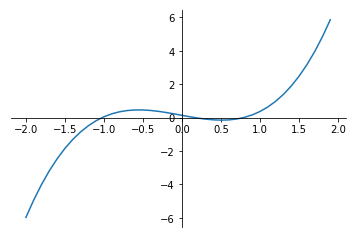

Iteration	 	 a		 	 b		 	 c
0		 -2.000000	 -1.000000	 -1.500000
1		 -1.500000	 -1.000000	 -1.250000
2		 -1.250000	 -1.000000	 -1.125000
3		 -1.125000	 -1.000000	 -1.062500
4		 -1.062500	 -1.000000	 -1.031250
5		 -1.031250	 -1.000000	 -1.015625
6		 -1.031250	 -1.015625	 -1.023438
7		 -1.031250	 -1.023438	 -1.027344
8		 -1.027344	 -1.023438	 -1.025391
9		 -1.025391	 -1.023438	 -1.024414
10		 -1.024414	 -1.023438	 -1.023926
11		 -1.023926	 -1.023438	 -1.023682
12		 -1.023682	 -1.023438	 -1.023560
13		 -1.023560	 -1.023438	 -1.023499
14		 -1.023499	 -1.023438	 -1.023468
15		 -1.023499	 -1.023468	 -1.023483
16		 -1.023483	 -1.023468	 -1.023476
The root after 16th iteration is: -1.023476 


In [18]:
# 1.1 Bisection Method
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.exp(x-2) +x**3-x

def bisection(a,b,tolerance):
    if (func(a) * func(b) >= 0):
        print("You have not assumed right a and b\n")
        return
    
    count = 0
    print ("Iteration\t \t a\t\t \t b\t\t \t c")
    while ((b-a) >= tolerance):
    #for i in range(15):
        
        # Find middle point
        c = (a+b)/2
        print ("%d\t\t %.6f\t %.6f\t %.6f" %(count, a ,b ,c))
        # Check if middle point is root
        if (func(c) == 0):
            break

        # Decide the side to repeat the steps
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c
        count += 1
    print("The root after %dth iteration is: %.6f " %(count-1, c))

x = np.arange(-2,2,0.1)
y = func(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y)
plt.show()

a = -2
b = -1
tolerance = 0.00001
bisection(a, b, tolerance)

In [52]:
# 1.2 Fixed Point Iteration

def func2(x):
    # Question 1
    #return (2*x+2)**(1/3)
    #return np.log(7-x)
    #return np.log(4-np.sin(x))
    
    # Question 3
    #return 3**(1/2)
    #return 5**(1/2)
    
    #Question 5
    #return np.cos(x)**2
    # derivative of cos^2x is -2cos(x)sin(x)
    #return -2*np.cos(x)*np.sin(x) gives us a local convergence where S |g'(r)| < 1
    
    #Question 7
    #return 1-5*x+(15)/(2)*x**2-(5)/(2)*x**3

def fpi(x,iteration):
    print("\n i \t \t \t Xi \t \t \t g(Xi)")
    for i in range(iteration):
        print (i, "\t \t %.6f \t" %x, end= " ")
        x = func2(x)
        print("%.6f \t \t " %x)
    root = x
    print("The root after %dth iteration is: " "%.6f" %(i,root))

x = 0.5
iteration = 10

fpi(x, iteration)


 i 	 	 	 Xi 	 	 	 g(Xi)
0 	 	 0.500000 	 1.871802 	 	 
1 	 	 1.871802 	 1.634754 	 	 
2 	 	 1.634754 	 1.679942 	 	 
3 	 	 1.679942 	 1.671484 	 	 
4 	 	 1.671484 	 1.673073 	 	 
5 	 	 1.673073 	 1.672775 	 	 
6 	 	 1.672775 	 1.672831 	 	 
7 	 	 1.672831 	 1.672820 	 	 
8 	 	 1.672820 	 1.672822 	 	 
9 	 	 1.672822 	 1.672822 	 	 
The root after 9th iteration is: 1.672822
